In [65]:
#importação 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [66]:
#importação do cvs
df= pd.read_csv('https://www.ispdados.rj.gov.br/Arquivos/BaseDPEvolucaoMensalCisp.csv', sep= ';', encoding='latin1')
df

,cisp,mes,ano,mes_ano,aisp,risp,munic,mcirc,regiao,hom_doloso,...,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
0,1,1,2003,2003m01,5,1,Rio de Janeiro,3304557,Capital,0,...,NaN,NaN,21,2,0,0,0,0,578,3
1,4,1,2003,2003m01,5,1,Rio de Janeiro,3304557,Capital,3,...,NaN,NaN,15,6,0,1,0,0,441,3
2,5,1,2003,2003m01,5,1,Rio de Janeiro,3304557,Capital,3,...,NaN,NaN,47,2,1,0,0,0,637,3
3,6,1,2003,2003m01,1,1,Rio de Janeiro,3304557,Capital,6,...,NaN,NaN,26,2,1,0,0,0,473,3
4,7,1,2003,2003m01,1,1,Rio de Janeiro,3304557,Capital,4,...,NaN,NaN,10,1,3,0,0,0,147,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36213,159,5,2025,2025m05,35,4,Cachoeiras de Macacu,3300803,Interior,1,...,3.0,0.0,24,1,0,0,0,0,150,2
36214,165,5,2025,2025m05,33,5,Mangaratiba,3302601,Interior,1,...,7.0,0.0,29,2,0,0,0,0,208,2
36215,166,5,2025,2025m05,33,5,Angra dos Reis,3300100,Interior,3,...,14.0,1.0,59,2,0,0,0,0,580,2
36216,167,5,2025,2025m05,43,5,Paraty,3303807,Interior,3,...,6.0,0.0,37,0,0,0,0,0,230,2


In [67]:
#filtro das regiões dos lagos
df_lagos = df.loc[df['munic'].isin(['Araruama', 'Arraial do Cabo', 'Armação dos Búzios', 'Cabo Frio', 'Iguaba Grande', 'São Pedro da Aldeia', 'Saquarema'])]


In [68]:
#junção do ano, municipio e estelionato
df_vio = df_lagos.groupby('munic')[['hom_doloso', 'lesao_corp_morte', 'latrocinio',  'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa','estupro']].sum().reset_index()
df_vio

,munic,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro
0,Araruama,1108,4,28,69,806,12997,975
1,Armação dos Búzios,440,4,10,26,418,6274,395
2,Arraial do Cabo,137,2,2,19,256,2604,209
3,Cabo Frio,1481,11,24,146,1576,12607,1360
4,Iguaba Grande,124,1,4,7,132,2964,219
5,Saquarema,594,5,21,47,623,9906,785
6,São Pedro da Aldeia,827,5,24,76,707,8474,780


In [69]:
df_vio['Crimes violentos']= df_vio['hom_doloso'] + df_vio['lesao_corp_morte'] + df_vio['hom_por_interv_policial']+df_vio['latrocinio']+ df_vio['tentat_hom']+ df_vio['lesao_corp_dolosa']+ df_vio['estupro']
df_vio= df_vio.sort_values(by= 'Crimes violentos')
df_vio

,munic,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,Crimes violentos
2,Arraial do Cabo,137,2,2,19,256,2604,209,3229
4,Iguaba Grande,124,1,4,7,132,2964,219,3451
1,Armação dos Búzios,440,4,10,26,418,6274,395,7567
6,São Pedro da Aldeia,827,5,24,76,707,8474,780,10893
5,Saquarema,594,5,21,47,623,9906,785,11981
0,Araruama,1108,4,28,69,806,12997,975,15987
3,Cabo Frio,1481,11,24,146,1576,12607,1360,17205


In [70]:
#array dos crimes
crimes= df_vio['Crimes violentos']
dados= np.array(crimes)

In [71]:
#quartil
q1= np.percentile(dados, 25)
q1

np.float64(5509.0)

In [72]:
#condição menor que 25%
df_maior= df_vio.loc[(df_vio['Crimes violentos'] <= q1)]
df_maior=df_maior[['munic', 'Crimes violentos']]
df_maior


,munic,Crimes violentos
2,Arraial do Cabo,3229
4,Iguaba Grande,3451


In [73]:
#condição maior que 25%
df_maior= df_vio.loc[(df_vio['Crimes violentos'] >= q1)]
df_maior=df_maior[['munic', 'Crimes violentos']]
df_maior= df_maior.sort_values(by= 'Crimes violentos')
df_maior

,munic,Crimes violentos
1,Armação dos Búzios,7567
6,São Pedro da Aldeia,10893
5,Saquarema,11981
0,Araruama,15987
3,Cabo Frio,17205


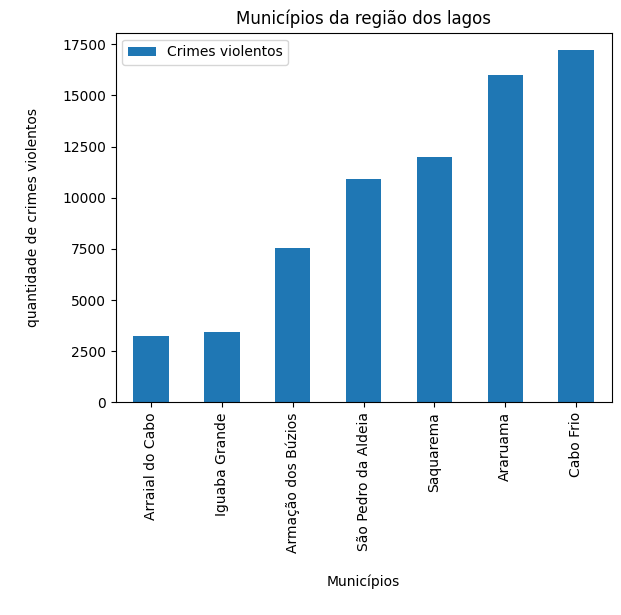

In [74]:
df_vio.plot(x='munic', y='Crimes violentos',kind= 'bar')
plt.title('Municípios da região dos lagos')
plt.xlabel('\nMunicípios\n')
plt.ylabel('\nquantidade de crimes violentos\n')
plt.show()